In [1849]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1850]:
df= pd.read_csv('data/Housing.csv')
df #dataset before preprocessing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [1851]:
bin_col=['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
for col in bin_col:
    df[col] = df[col].str.lower().map({'yes': 1, 'no': 0})

In [1852]:
df=df.join(pd.get_dummies(df.furnishingstatus)).drop(['furnishingstatus'],axis=1)
df= df.drop(['unfurnished'],axis=1)
df[['furnished','semi-furnished']] = df[['furnished','semi-furnished']].astype(int)
df #dataset after preprocessing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0


In [1853]:
df.query('area > 12500')
df=df.drop([10,211,403,7,125,66,271,536]) # dropping outliers

Feature Engineering

In [ ]:
#TODO Feature Engineering

In [1855]:
from sklearn.model_selection import train_test_split
X= df.drop(['price'],axis=1)
Y=df['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
train_data=X_train.join(Y_train)
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,price
31,7000,3,1,4,1,0,0,0,1,2,0,0,1,8400000
62,6240,4,2,2,1,0,0,0,1,1,0,1,0,7070000
369,3600,2,1,1,1,0,0,0,0,0,0,1,0,3675000
383,4500,4,2,2,1,0,1,0,0,2,0,1,0,3570000
191,10700,3,1,2,1,1,1,0,0,0,0,0,1,5040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,4785,3,1,2,1,1,1,0,1,1,0,1,0,3395000
281,4500,2,1,1,1,0,0,0,1,2,0,1,0,4270000
395,3600,6,1,2,1,0,0,0,0,1,0,0,0,3500000
144,4700,4,1,2,1,1,1,0,1,1,0,1,0,5600000


In [1856]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
numeric_col=['area','bedrooms','bathrooms','stories','parking']
train_data[numeric_col]=scale.fit_transform(train_data[numeric_col]) #Scaling features

Fitting Linear Regression Model

In [1857]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [1858]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Y_predict=lreg.predict(X_test)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rsq = r2_score(Y_test, Y_predict)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {rsq}")

MAE: 664612.1439268833
MSE: 995937609262.1942
R²: 0.7298914971686565


MAE: Mean Absolute error, measures the average error produced by the model's predictions, its units are the same as target value's units (Price) (lower is better)
MSE: Mean Squared Error, measures average of the square of difference between Actual value and Model's prediction (lower is better)
R^2: explains the variance in the target variable (higher is better)

lists down the coefficients assigned to each feature, 1 unit increase in a feature will result in 'coeff' unit increase in the target value i.e. Price (assuming other features remain same)

Plotting Regression Line

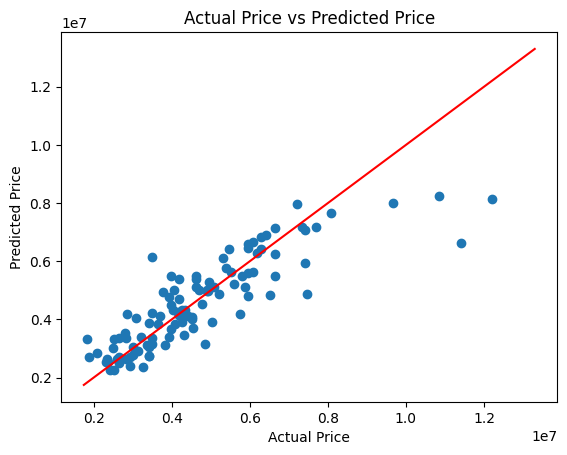

In [1859]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red')  # Ideal line
plt.show()

In [1860]:
# sns.displot((Y_test-Y_predict),bins=15,kde=True)
# plt.show()

Interpreting coefficients

In [1861]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lreg.coef_
})
coefficients

,Feature,Coefficient
0,area,259.396098
1,bedrooms,92359.509888
2,bathrooms,924159.247484
3,stories,474913.200991
4,mainroad,368539.972484
5,guestroom,308686.042359
6,basement,314051.455995
7,hotwaterheating,742842.439680
8,airconditioning,830492.121662
9,parking,260153.265241


lists down the coefficients assigned to each feature, 1 unit increase in a feature will result in 'coeff' unit increase in the target value i.e. Price (assuming other features remain same)

airconditioning has the highest impact on price 
features like AC, hot water heating, bathrooms, and stories are top determiners
Location-related features (mainroad, prefarea) have large effects too

